In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
tf.__version__

'1.13.1'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

45919


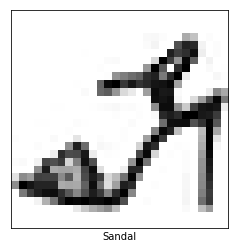

In [7]:
np.random.seed(101)
random_id = np.random.randint(60000)
print(random_id)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[y_train[random_id]])
plt.imshow(x_train[random_id], cmap='binary')

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

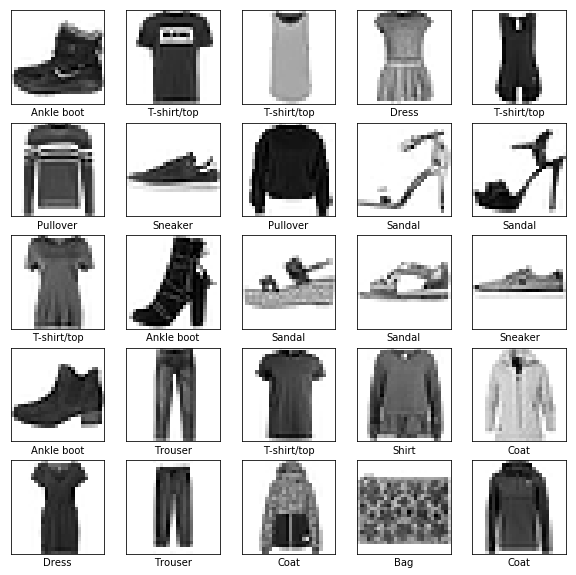

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5031 - acc: 0.8165
Epoch 2/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3819 - acc: 0.8601
Epoch 3/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3461 - acc: 0.8746
Epoch 4/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3199 - acc: 0.8828
Epoch 5/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3037 - acc: 0.8880
Epoch 6/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2917 - acc: 0.8908
Epoch 7/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2798 - acc: 0.8961
Epoch 8/25
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2690 - acc: 0.8991
Epoch 9/25
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2595 - acc: 0.9036
Epoch 10/25
60000/60000 [==============================] - 3s 57us/sample - loss: 

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3699 - acc: 0.8935
Test accuracy: 0.8935


In [14]:
predictions = model.predict(x_test)

In [15]:
predictions[0]

array([4.0429995e-08, 6.2783014e-09, 1.4555505e-08, 4.3423203e-09,
       2.1309245e-09, 3.6179059e-04, 6.6947725e-10, 2.7012301e-03,
       1.2379609e-08, 9.9693692e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])


9

In [17]:
y_test[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

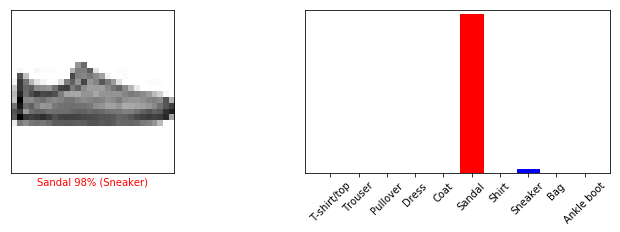

In [19]:
i = 12
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

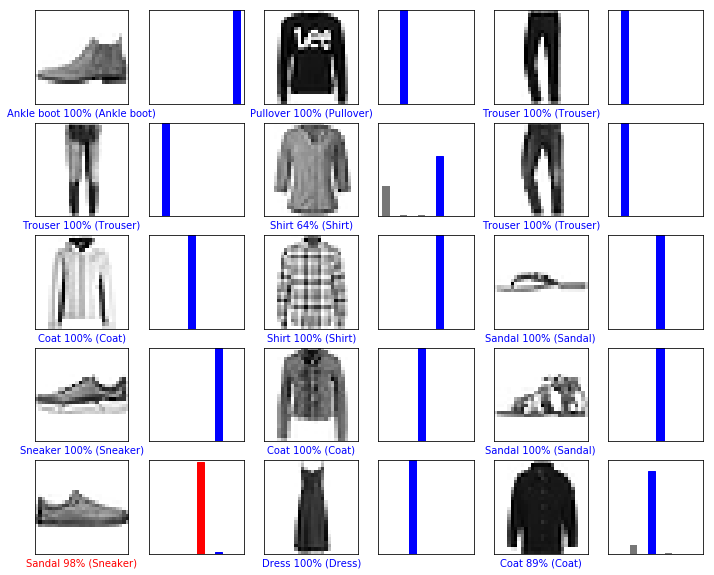

In [20]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

In [21]:
from sklearn import metrics

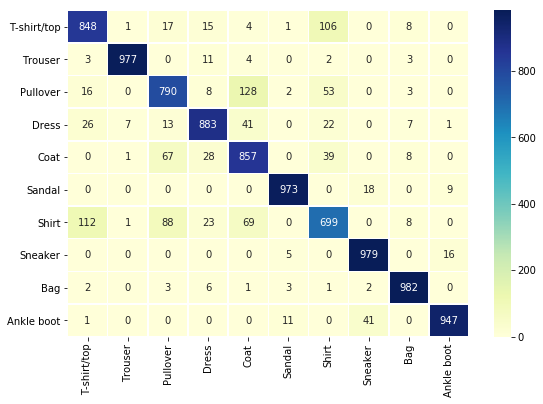

In [22]:
cf = (metrics.confusion_matrix(y_test, y_pred=[np.argmax(p) for p in predictions]))
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cf, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels=class_names, yticklabels=class_names, cmap='YlGnBu')

In [23]:
print(metrics.classification_report(y_test,y_pred=[np.argmax(p) for p in predictions], target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.79      0.80      1000
       Dress       0.91      0.88      0.89      1000
        Coat       0.78      0.86      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.76      0.70      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [24]:
diff = y_test != [np.argmax(p) for p in predictions]

In [25]:
diff = np.argwhere(diff)

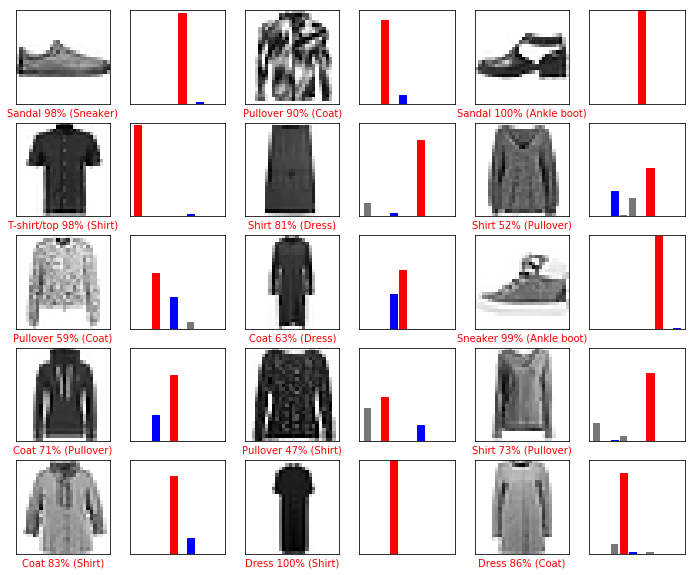

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    mistake = diff[i][0]
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(mistake, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(mistake, predictions, y_test)

In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
class_names[y_test[diff[0][0]]]

'Sneaker'